In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dye=pd.read_csv("emission wavelength prediction.csv")

In [3]:
dye


,solut_smile,solvent_SMILES,Col_0,Col_1,Col_2,Col_3,Col_4,Col_5,Col_6,Col_7,...,Col_2046.1,Col_2047.1,PLQY,Et30,SP,SdP,SA,SB,Absorption/nm,Emission/nm
0,C1(C2=NN(C3=CC=CC4=C3C=CC=C4)N=C2)=CC=CC=C1,CO,0,0,0,0,0,0,0,0,...,0,0,0.2700,55.4,0.608,0.904,0.605,0.545,260.0,296.0
1,O=C(C1=CC=CC=C1)C2=NN(C3=CC=CC=C3)N=C2C4=CC=CC=C4,CO,0,0,0,0,0,0,0,0,...,0,0,0.0200,55.4,0.608,0.904,0.605,0.545,263.0,316.0
2,C1(C2=NN(C3=NC=CC=C3)N=C2)=CC=CC=C1,CO,0,0,0,0,0,0,0,0,...,0,0,0.1500,55.4,0.608,0.904,0.605,0.545,276.0,341.0
3,FC(C=C1)=CC=C1C2=NN(C3=CC=C(F)C=C3)N=C2,CO,0,0,0,0,0,0,0,0,...,0,0,0.4000,55.4,0.608,0.904,0.605,0.545,277.0,343.0
4,O=C(OCC)C1=NN(N=C1C2=CC=CC=C2)C3=CC=C(N(C4=CC=...,C1CCOC1,0,0,0,0,0,0,0,0,...,0,0,0.9600,37.4,0.714,0.634,0.000,0.591,277.0,449.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3061,C12=C(CCC3)C4=[N+]3CCCC4=CC1=CC(C5=C2)=C(C6=CC...,C(Cl)Cl,0,0,0,0,0,0,0,0,...,0,0,0.0870,40.7,0.761,0.769,0.040,0.178,880.0,921.0
3062,COC1=CC=CC=C1C(C2=CC(C=C3C4=C5CCCN4CCC3)=C5C=C...,C(Cl)Cl,0,0,0,0,0,0,0,0,...,0,0,0.0920,40.7,0.761,0.769,0.040,0.178,880.0,919.0
3063,CCC1=CC=CC=C1C(C2=CC(C=C3C4=C5CCCN4CCC3)=C5C=C...,C(Cl)Cl,0,0,0,0,0,0,0,0,...,0,0,0.0920,40.7,0.761,0.769,0.040,0.178,882.0,922.0
3064,COCC1=CC=CC=C1C(C2=CC(C=C3C4=C5CCCN4CCC3)=C5C=...,C(Cl)Cl,0,0,0,0,0,0,0,0,...,0,0,0.0760,40.7,0.761,0.769,0.040,0.178,885.0,926.0


In [4]:
# Calculate the evaluation parameters
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score
def AllParameter(name="Hybrid", y_test=None , y_pred=None):
    mse = round(mean_squared_error(y_test, y_pred),4)
    mae = round(mean_absolute_error(y_test, y_pred),4)
    rmse = round(mean_squared_error(y_test, y_pred, squared=False),4)
    r2 = round(r2_score(y_test, y_pred),4)
    evs = round(explained_variance_score(y_test, y_pred),4)
    return name,mae,mse,rmse,evs,r2

In [5]:
# Scatter plot
def scatter_plot(name,y_test,y_pred):
    plt.scatter(y_test, y_pred)
    # Fit a straight line using coefficients
    coefficients = np.polyfit(y_test, y_pred, 1)
    line = np.polyval(coefficients, y_test)

    # Plot straight line
    plt.plot(y_test, line, color='r', label='Line of Coefficients')
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title(name)
    plt.legend()
    plt.show()




In [7]:
dye.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3066 entries, 0 to 3065
Columns: 4106 entries, solut_smile to Emission/nm
dtypes: float64(8), int64(4096), object(2)
memory usage: 96.0+ MB


In [8]:
X = dye.iloc[:, 2 :4105].values
y = dye.iloc[:,4105].values

In [9]:
#for single model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso, ElasticNet, BayesianRidge, ARDRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from catboost import CatBoostRegressor

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

('Ridge Regression', 20.1452, 736.1608, 27.1323, 0.9199, 0.9188)


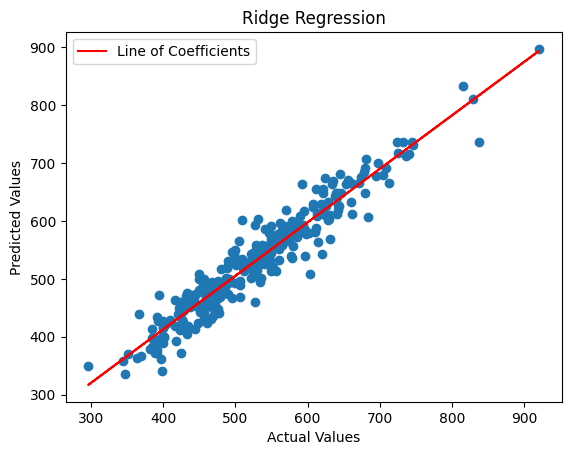

('Lasso Regression', 32.8944, 1766.15, 42.0256, 0.8057, 0.8053)


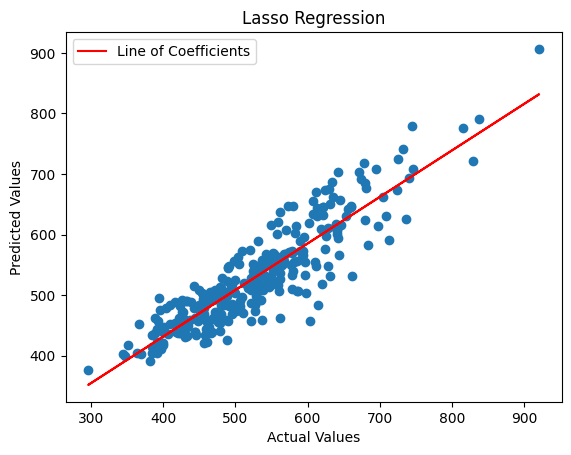

('Elastic Net Regression', 35.234, 2057.8458, 45.3635, 0.7733, 0.7731)


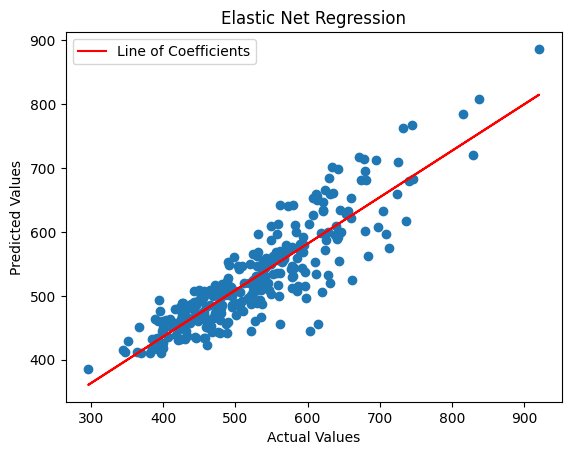

('Decision Tree Regression', 21.6613, 1349.5562, 36.7363, 0.8515, 0.8512)


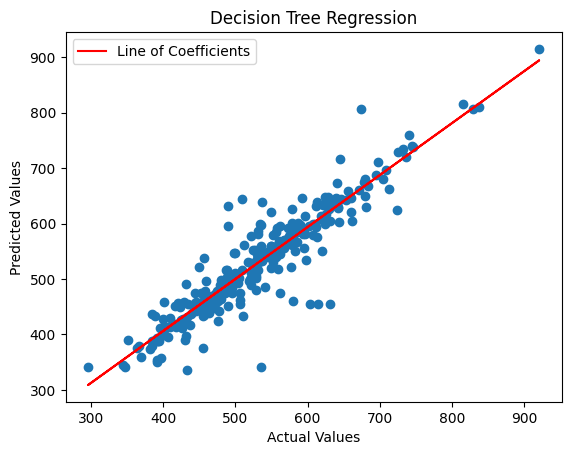

('Random Forest Regression', 15.8921, 595.2081, 24.3969, 0.9345, 0.9344)


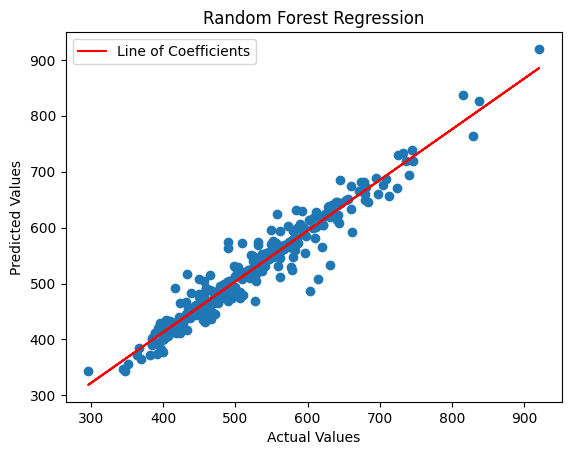

('Extra Trees Regression', 14.2048, 505.2572, 22.4779, 0.9444, 0.9443)


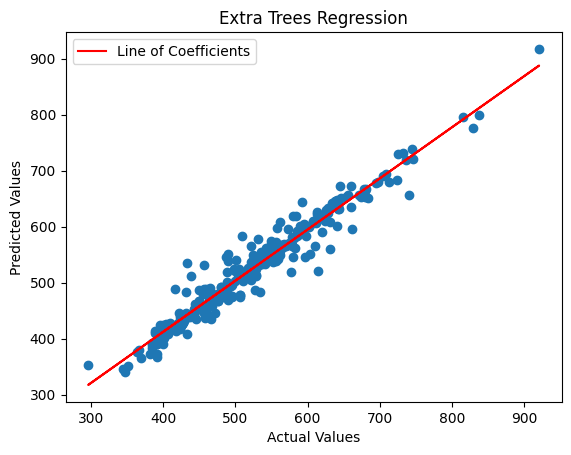

('AdaBoost Regression', 37.5904, 2158.3896, 46.4585, 0.7871, 0.762)


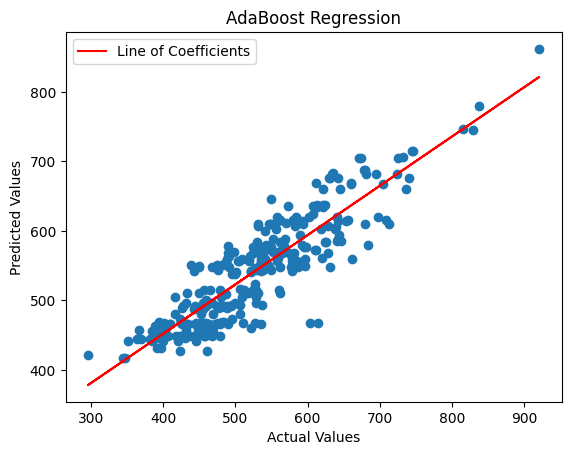

('Gradient Boosting Regression', 22.687, 925.3398, 30.4194, 0.8983, 0.898)


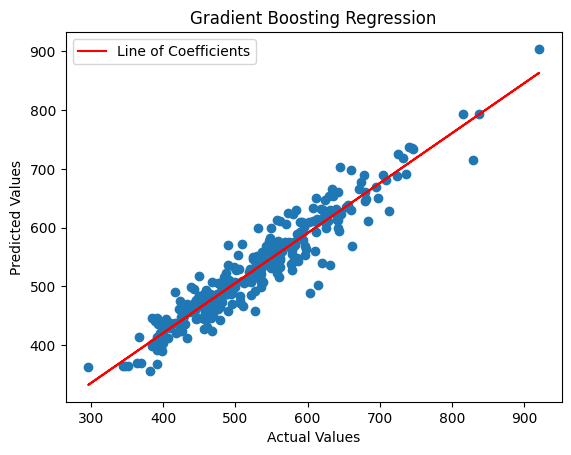

('XGBoost Regression', 16.0056, 555.919, 23.5779, 0.9392, 0.9387)


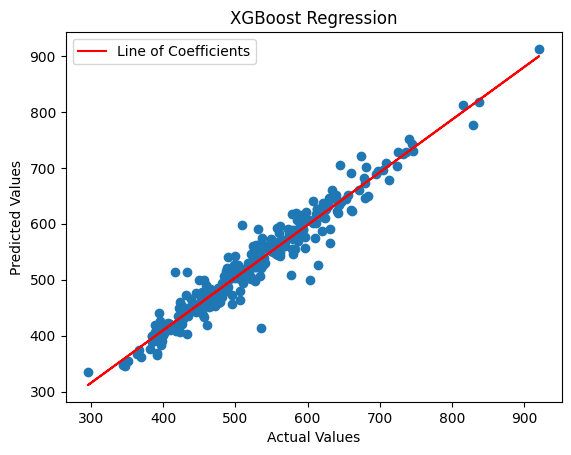

Learning rate set to 0.048064
0:	learn: 89.7605491	total: 276ms	remaining: 4m 35s
1:	learn: 87.4049158	total: 290ms	remaining: 2m 24s
2:	learn: 85.0254369	total: 303ms	remaining: 1m 40s
3:	learn: 82.9901179	total: 316ms	remaining: 1m 18s
4:	learn: 80.9237410	total: 327ms	remaining: 1m 5s
5:	learn: 78.7476220	total: 340ms	remaining: 56.3s
6:	learn: 76.7417688	total: 354ms	remaining: 50.3s
7:	learn: 74.8810693	total: 366ms	remaining: 45.4s
8:	learn: 73.0845812	total: 379ms	remaining: 41.7s
9:	learn: 71.2050169	total: 392ms	remaining: 38.9s
10:	learn: 69.6496525	total: 404ms	remaining: 36.3s
11:	learn: 68.1896275	total: 416ms	remaining: 34.2s
12:	learn: 66.7333230	total: 430ms	remaining: 32.7s
13:	learn: 65.2833777	total: 442ms	remaining: 31.2s
14:	learn: 63.9104112	total: 455ms	remaining: 29.9s
15:	learn: 62.6558667	total: 469ms	remaining: 28.8s
16:	learn: 61.4877310	total: 482ms	remaining: 27.9s
17:	learn: 60.3943289	total: 498ms	remaining: 27.2s
18:	learn: 59.1644484	total: 513ms	remai

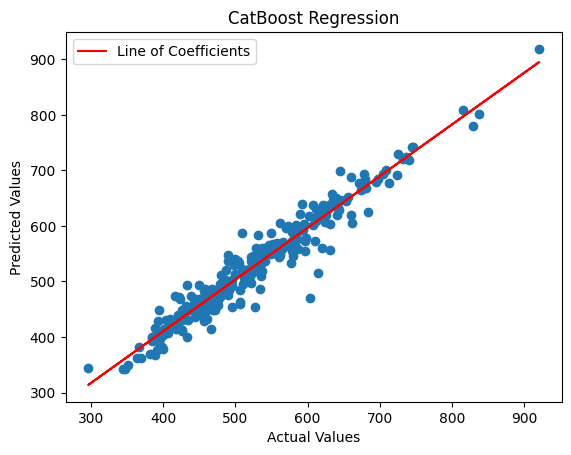

('LightGBM Regression', 15.1505, 494.5135, 22.2377, 0.9455, 0.9455)


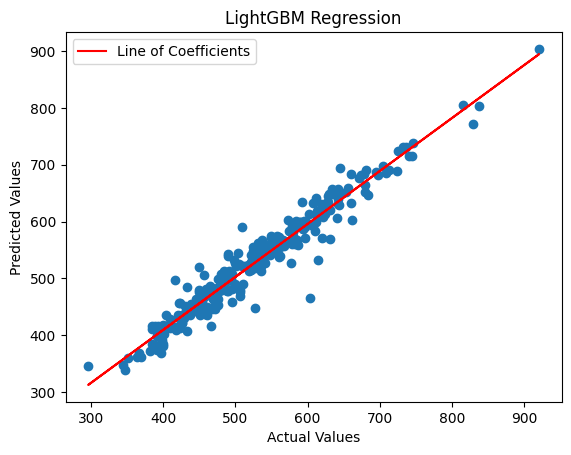

('KNeighbors Regression', 23.2607, 1319.5571, 36.3257, 0.8548, 0.8545)


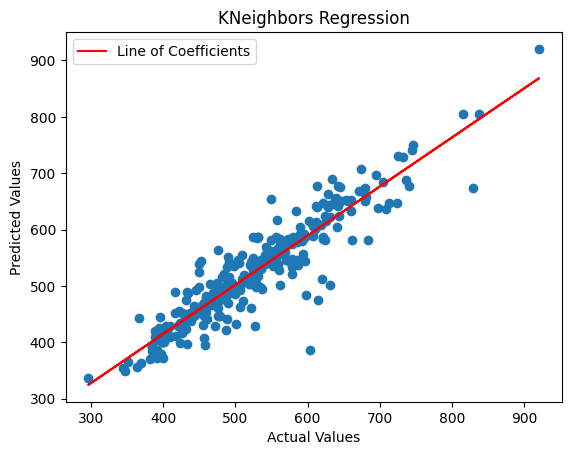

c:\Users\NIT JSR PHYSICS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


('MLP Regression', 19.1759, 700.7158, 26.471, 0.9229, 0.9227)


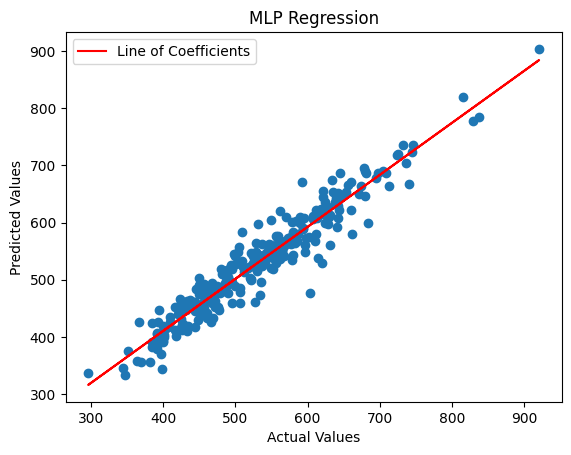

('Bayesian Ridge Regression', 20.354, 749.3562, 27.3744, 0.9183, 0.9174)


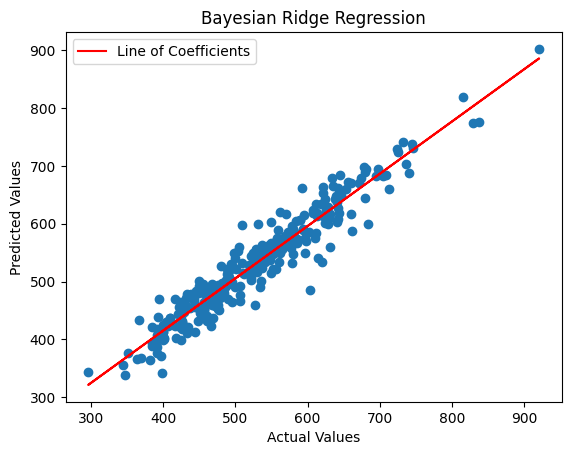

('ARD Regression', 21.2706, 891.7801, 29.8627, 0.9036, 0.9017)


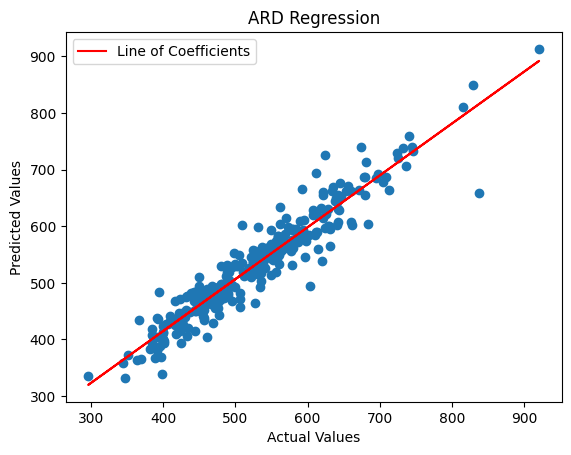

In [11]:
name_of_model=[]
mae=[]
mse=[]
rmse=[]
r2=[]
evs=[]

# Create a list of regression models
models = []
models.append(('Ridge Regression', Ridge()))
models.append(('Lasso Regression', Lasso()))
models.append(('Elastic Net Regression', ElasticNet()))
models.append(('Decision Tree Regression', DecisionTreeRegressor()))
models.append(('Random Forest Regression', RandomForestRegressor()))
models.append(('Extra Trees Regression', ExtraTreesRegressor()))
models.append(('AdaBoost Regression', AdaBoostRegressor()))
models.append(('Gradient Boosting Regression', GradientBoostingRegressor()))
models.append(('XGBoost Regression', XGBRegressor()))
models.append(('CatBoost Regression', CatBoostRegressor()))
models.append(('LightGBM Regression', LGBMRegressor()))
models.append(('KNeighbors Regression', KNeighborsRegressor()))
models.append(('MLP Regression', MLPRegressor()))
models.append(('Bayesian Ridge Regression', BayesianRidge()))
models.append(('ARD Regression', ARDRegression()))
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    k=AllParameter(name,y_test, y_pred)
    name_of_model.append(k[0])
    mae.append(k[1])
    mse.append(k[2])
    rmse.append(k[3])
    evs.append(k[4])
    r2.append(k[5])
   
    print(k)
    # graph(name,y_test, y_pred)
    scatter_plot(name,y_test, y_pred)



('Hybrid Model', 13.4227, 436.5254, 20.8932, 0.952, 0.9519)


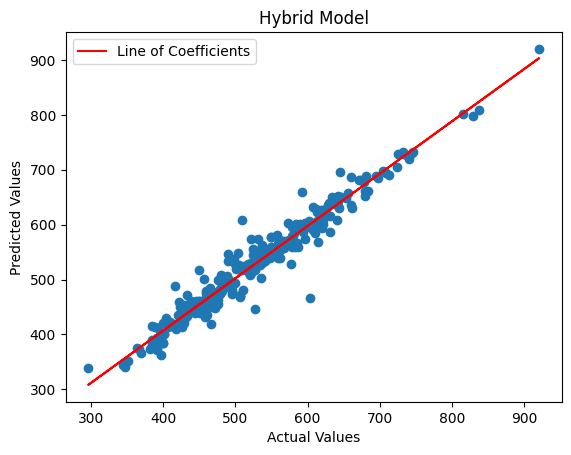

In [13]:
#  Train a LGBMRegressor model
model1 = LGBMRegressor()
model1.fit(X_train, y_train)

# Use the predictions of the LGBMRegressor model as inputs for the ExtraTreesRegressor
pred_model1 = model1.predict(X_train)
X_train_rf = np.column_stack((X_train, pred_model1))
model2 = ExtraTreesRegressor()
model2.fit(X_train_rf, y_train)

# Evaluate the sequential hybrid model
pred_model1_test = model1.predict(X_test)
X_test_rf = np.column_stack((X_test, pred_model1_test))
predictions = model2.predict(X_test_rf)

print(AllParameter('Hybrid Model', y_test, predictions))

scatter_plot('Hybrid Model',y_test, predictions)

